In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
unemployment = pd.read_csv('clean_unemployment.csv', index_col=0)

In [5]:
print(unemployment.head())

                      country_name      continent   2010   2011   2012   2013  \
country_code                                                                    
AFG                    Afghanistan           Asia  11.35  11.05  11.34  11.19   
AGO                         Angola         Africa   9.43   7.36   7.35   7.37   
ALB                        Albania         Europe  14.09  13.48  13.38  15.87   
ARE           United Arab Emirates           Asia   2.48   2.30   2.18   2.04   
ARG                      Argentina  South America   7.71   7.18   7.22   7.10   

               2014   2015   2016   2017   2018   2019   2020   2021  
country_code                                                          
AFG           11.14  11.13  11.16  11.18  11.15  11.22  11.71  13.28  
AGO            7.37   7.39   7.41   7.41   7.42   7.42   8.33   8.53  
ALB           18.05  17.19  15.42  13.62  12.30  11.47  13.33  11.82  
ARE            1.91   1.77   1.64   2.46   2.35   2.23   3.19   3.36  
ARG   

In [6]:
print(unemployment.info())

<class 'pandas.core.frame.DataFrame'>
Index: 182 entries, AFG to ZWE
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   country_name  182 non-null    object 
 1   continent     177 non-null    object 
 2   2010          182 non-null    float64
 3   2011          182 non-null    float64
 4   2012          182 non-null    float64
 5   2013          182 non-null    float64
 6   2014          182 non-null    float64
 7   2015          182 non-null    float64
 8   2016          182 non-null    float64
 9   2017          182 non-null    float64
 10  2018          182 non-null    float64
 11  2019          182 non-null    float64
 12  2020          182 non-null    float64
 13  2021          182 non-null    float64
dtypes: float64(12), object(2)
memory usage: 21.3+ KB
None


In [7]:
print(unemployment.describe())

             2010        2011        2012        2013        2014        2015  \
count  182.000000  182.000000  182.000000  182.000000  182.000000  182.000000   
mean     8.409286    8.315440    8.317967    8.344780    8.179670    8.058901   
std      6.248887    6.266795    6.367270    6.416041    6.284241    6.161170   
min      0.450000    0.320000    0.480000    0.250000    0.200000    0.170000   
25%      4.015000    3.775000    3.742500    3.692500    3.625000    3.662500   
50%      6.965000    6.805000    6.690000    6.395000    6.450000    6.170000   
75%     10.957500   11.045000   11.285000   11.310000   10.695000   10.215000   
max     32.020000   31.380000   31.020000   29.000000   28.030000   27.690000   

             2016        2017        2018        2019        2020        2021  
count  182.000000  182.000000  182.000000  182.000000  182.000000  182.000000  
mean     7.925879    7.668626    7.426429    7.243736    8.420934    8.390879  
std      6.045439    5.902152 

In [8]:
# Count the values associated with each continent in unemployment
print(unemployment['continent'].value_counts())

continent
Africa           53
Asia             47
Europe           39
North America    18
South America    12
Oceania           8
Name: count, dtype: int64


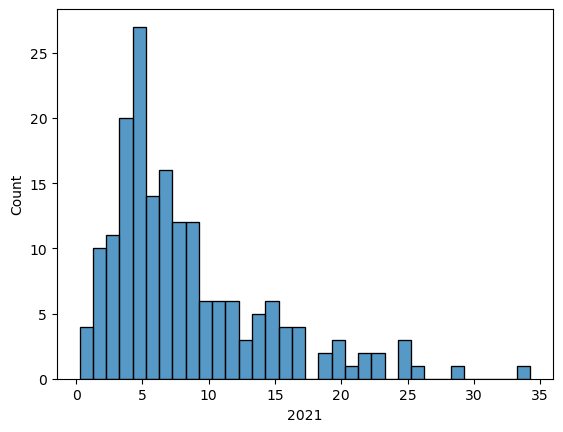

In [9]:
# Create a histogram of 2021 unemployment; show a full percent in each bin
sns.histplot(data=unemployment, x='2021', binwidth=1)
plt.show()

0.26 33.56


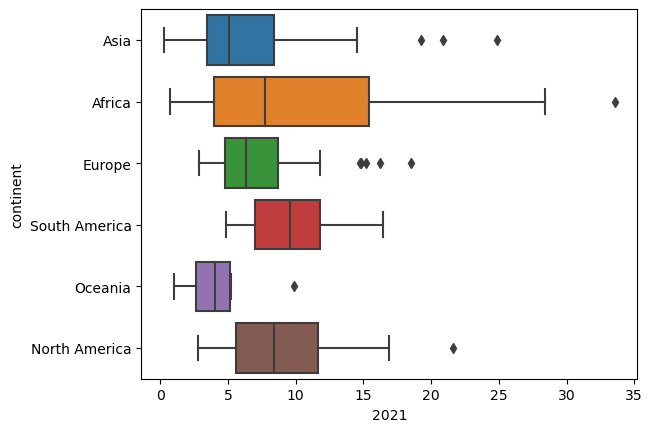

In [11]:
# minimum and maximum unemployment rates during 2021
print(unemployment['2021'].min(), unemployment['2021'].max())

# boxplot of 2021 unemployment rates, broken down by continent
sns.boxplot(data=unemployment, x='2021', y='continent')
plt.show()

In [14]:
continent_summary = unemployment.groupby("continent").agg(
    # Create the mean_rate_2021 column
    mean_rate_2021=('2021','mean'),
    # Create the std_rate_2021 column
    std_rate_2021=('2021','std')
)
print(continent_summary)

               mean_rate_2021  std_rate_2021
continent                                   
Africa              10.473585       8.131636
Asia                 6.906170       5.414745
Europe               7.414872       3.947825
North America        9.155000       5.076482
Oceania              4.280000       2.671522
South America        9.924167       3.611624


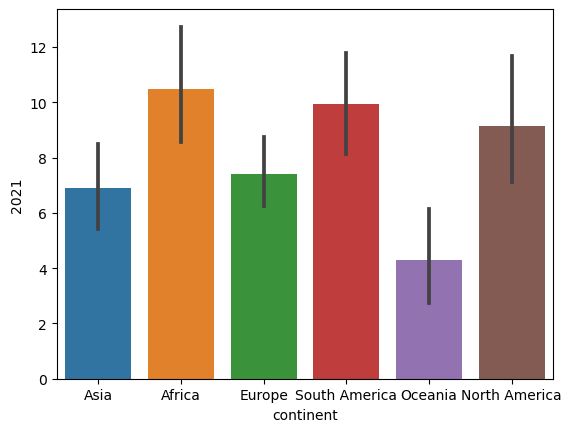

In [15]:
# bar plot of continents and their average unemployment
sns.barplot(data=unemployment, x='continent',y='2021')
plt.show()

In [17]:
planes = pd.read_csv('planes.csv',index_col=0)

# number of missing values in each column
print(planes.isna().sum())

Date_of_Journey    322
Source             187
Destination        347
Route              256
Dep_Time           260
Arrival_Time       194
Duration           214
Total_Stops        212
Additional_Info    589
Price              616
dtype: int64


In [18]:
print(planes['Additional_Info'].value_counts())

Additional_Info
No info                         7867
In-flight meal not included     1874
No check-in baggage included     299
1 Long layover                    18
Change airports                    7
No Info                            2
1 Short layover                    1
Business class                     1
Red-eye flight                     1
2 Long layover                     1
Name: count, dtype: int64


In [19]:
# median plane ticket prices by Airline
airline_prices = planes.groupby("Airline")["Price"].median()

print(airline_prices)

Airline
Air Asia              5192.0
Air India             9443.0
GoAir                 5135.0
IndiGo                5013.0
Jet Airways          11467.0
Multiple carriers     9871.0
SpiceJet              3873.0
Vistara               8028.0
Name: Price, dtype: float64


In [20]:
# Filter the DataFrame for object columns
non_numeric = planes.select_dtypes("object")

for col in non_numeric.columns:
  
    # number of unique values
  print(f"Number of unique values in {col} column: ", non_numeric[col].nunique())

Number of unique values in Date_of_Journey column:  44
Number of unique values in Source column:  5
Number of unique values in Destination column:  6
Number of unique values in Route column:  126
Number of unique values in Dep_Time column:  221
Number of unique values in Arrival_Time column:  1334
Number of unique values in Duration column:  367
Number of unique values in Total_Stops column:  5
Number of unique values in Additional_Info column:  10


In [26]:
planes.head()

,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,airline_price_st_dev
Airline,,,,,,,,,,,
Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19,2 stops,No info,13882.0,4230.748840
IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5 25m,1 stop,No info,6218.0,2266.753552
IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4 45m,1 stop,No info,13302.0,2266.753552
SpiceJet,24/06/2019,Kolkata,Banglore,CCU → BLR,09:00,11:25,2 25m,non-stop,No info,3873.0,1790.851944
Jet Airways,12/03/2019,Banglore,New Delhi,BLR → BOM → DEL,18:55,10:25 13 Mar,15 30m,1 stop,In-flight meal not included,11087.0,4230.748840


In [27]:
# standard deviation by Airline
planes["airline_price_st_dev"] = planes.groupby("Airline")["Price"].transform(lambda x: x.std())

print(planes["airline_price_st_dev"].value_counts())

airline_price_st_dev
4230.748840    3685
2266.753552    1981
3865.871975    1686
3763.674706    1148
1790.851944     787
2864.267802     455
2016.738954     309
2790.815129     182
Name: count, dtype: int64


In [32]:
# 75th and 25th percentiles
price_seventy_fifth = planes["Price"].quantile(0.75)
price_twenty_fifth = planes["Price"].quantile(0.25)

# iqr
prices_iqr = price_seventy_fifth - price_twenty_fifth

# thresholds
upper = price_seventy_fifth + (1.5 * prices_iqr)
lower = price_twenty_fifth - (1.5 * prices_iqr)

# Subset the data
planes = planes[(planes["Price"] > lower) & (planes["Price"] < upper)]

print(planes["Price"].describe())

count     9959.000000
mean      8875.160860
std       4057.202002
min       1759.000000
25%       5228.000000
50%       8283.000000
75%      12284.000000
max      23001.000000
Name: Price, dtype: float64


In [33]:
divorce = pd.read_csv("divorce.csv", parse_dates=["divorce_date", "dob_man", "dob_woman", "marriage_date"])
print(divorce.dtypes)

divorce_date         datetime64[ns]
dob_man              datetime64[ns]
education_man                object
income_man                  float64
dob_woman            datetime64[ns]
education_woman              object
income_woman                float64
marriage_date        datetime64[ns]
marriage_duration           float64
num_kids                    float64
dtype: object


In [34]:
divorce["marriage_date"] = pd.to_datetime(divorce['marriage_date'])

In [35]:
divorce["marriage_year"] = divorce['marriage_date'].dt.year

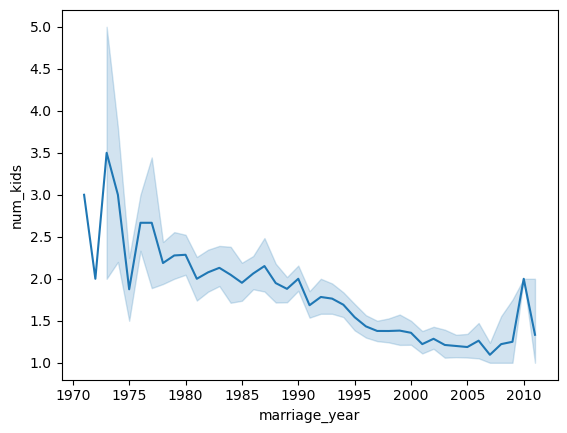

In [36]:
# line plot showing the average number of kids by year
sns.lineplot(data=divorce, x='marriage_year',y='num_kids')
plt.show()

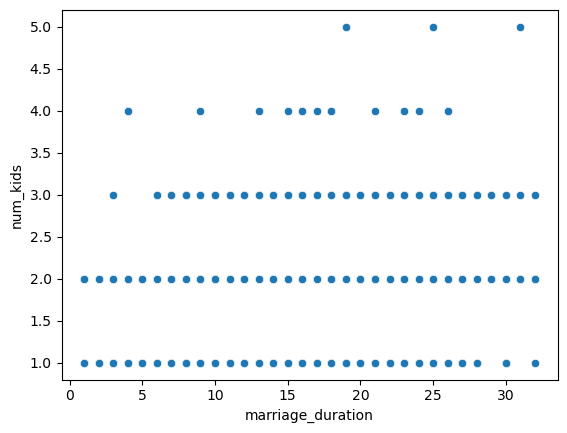

In [37]:
sns.scatterplot(data=divorce, x='marriage_duration', y='num_kids')
plt.show()

C:\Users\Lenovo\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


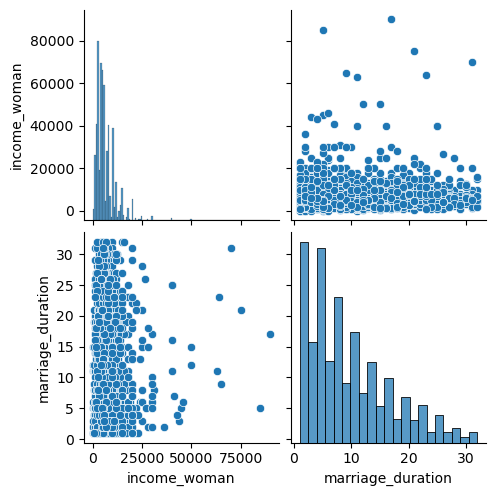

In [38]:
# pairplot for income_woman and marriage_duration
sns.pairplot(data=divorce, vars=[ 'income_woman','marriage_duration'])
plt.show()

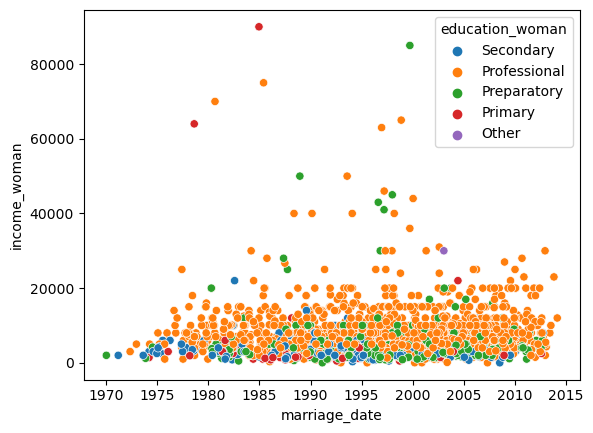

In [41]:
sns.scatterplot(data=divorce, x='marriage_date',y='income_woman',hue='education_woman')
plt.show()
# divorce.head()

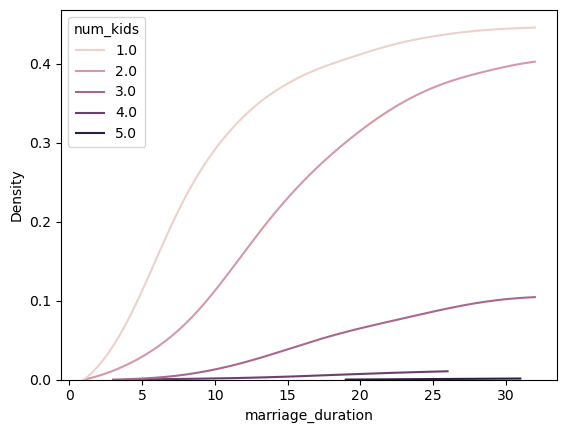

In [43]:
# KDE plot

sns.kdeplot(data=divorce, x="marriage_duration", hue="num_kids", cut=0, cumulative=True)
plt.show()

In [44]:
salaries = pd.read_csv('ds_salaries_clean.csv')
salaries.head()

,Working_Year,Designation,Experience,Employment_Status,Employee_Location,Company_Size,Remote_Working_Ratio,Salary_USD
0,2020,Data Scientist,Mid,FT,DE,L,0,76227.0
1,2020,Machine Learning Scientist,Senior,FT,JP,S,0,248257.0
2,2020,Big Data Engineer,Senior,FT,GB,M,50,104100.0
3,2020,Product Data Analyst,Mid,FT,HN,S,0,19097.0
4,2020,Machine Learning Engineer,Senior,FT,US,L,50,143225.0


In [46]:
print(salaries['Designation'].value_counts(normalize=True))

Designation
Data Scientist                              0.235585
Data Engineer                               0.217463
Data Analyst                                0.159802
Machine Learning Engineer                   0.067545
Research Scientist                          0.026359
Data Science Manager                        0.019769
Data Architect                              0.018122
Big Data Engineer                           0.013180
Machine Learning Scientist                  0.013180
Principal Data Scientist                    0.011532
AI Scientist                                0.011532
Data Science Consultant                     0.011532
Director of Data Science                    0.011532
Data Analytics Manager                      0.011532
ML Engineer                                 0.009885
Computer Vision Engineer                    0.009885
BI Data Analyst                             0.009885
Lead Data Engineer                          0.009885
Data Engineering Manager          

In [47]:
print(pd.crosstab(salaries["Company_Size"],salaries['Experience']))

Experience    Entry  Executive  Mid  Senior
Company_Size                               
L                29         11   86      72
M                30         12   98     186
S                29          3   29      22


In [48]:
print(pd.crosstab(salaries['Designation'],salaries['Company_Size']))

Company_Size                               L   M   S
Designation                                         
3D Computer Vision Researcher              0   1   0
AI Scientist                               2   2   3
Analytics Engineer                         0   4   0
Applied Data Scientist                     5   0   0
Applied Machine Learning Scientist         2   2   0
BI Data Analyst                            2   2   2
Big Data Architect                         0   1   0
Big Data Engineer                          4   2   2
Business Data Analyst                      4   1   0
Cloud Data Engineer                        1   0   1
Computer Vision Engineer                   0   4   2
Computer Vision Software Engineer          0   1   2
Data Analyst                              13  76   8
Data Analytics Engineer                    2   2   0
Data Analytics Lead                        1   0   0
Data Analytics Manager                     2   5   0
Data Architect                             3  

In [49]:
# Cross-tabulate Job_Category and Company_Size
print(pd.crosstab(salaries["Designation"], salaries["Company_Size"],
            values=salaries["Salary_USD"], aggfunc="mean"))

Company_Size                                          L              M  \
Designation                                                              
3D Computer Vision Researcher                       NaN    5165.000000   
AI Scientist                              121741.500000   63019.000000   
Analytics Engineer                                  NaN  167096.000000   
Applied Data Scientist                    167721.400000            NaN   
Applied Machine Learning Scientist        237754.000000   33550.500000   
BI Data Analyst                            88923.000000   94528.500000   
Big Data Architect                                  NaN   95200.000000   
Big Data Engineer                          27384.750000   80695.000000   
Business Data Analyst                      87132.000000   17609.000000   
Cloud Data Engineer                        85261.000000            NaN   
Computer Vision Engineer                            NaN   42467.750000   
Computer Vision Software Engineer     

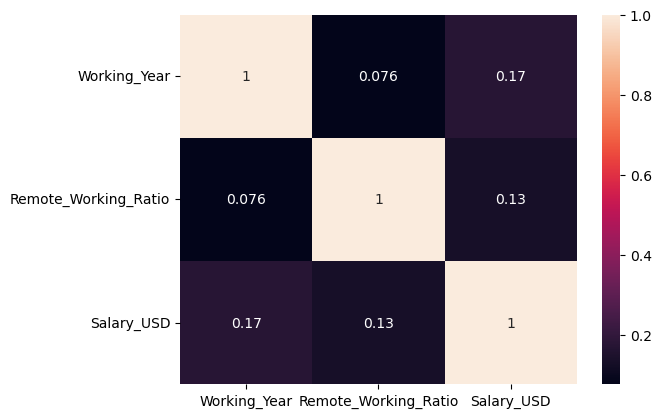

In [54]:
# heatmap

numeric_columns = salaries.select_dtypes(include=['float64', 'int64']).columns
sns.heatmap(salaries[numeric_columns].corr(), annot=True)
plt.show()

In [55]:
# 25th percentile
twenty_fifth = salaries["Salary_USD"].quantile(0.25)

# median
salaries_median = salaries["Salary_USD"].median()

# 75th percentile
seventy_fifth = salaries['Salary_USD'].quantile(0.75)
print(twenty_fifth, salaries_median, seventy_fifth)

59893.0 96982.0 143225.0


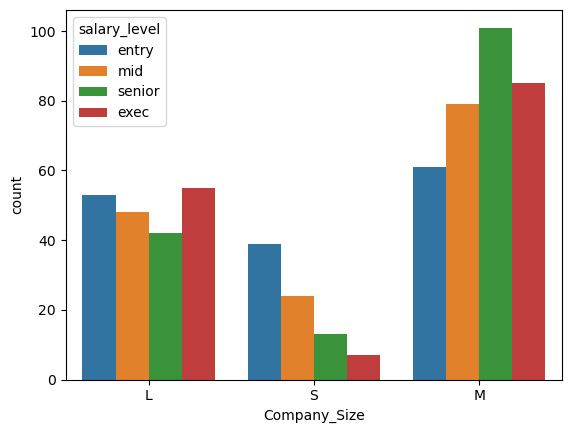

In [56]:
# salary labels
salary_labels = ["entry", "mid", "senior", "exec"]

# salary ranges list
salary_ranges = [0, twenty_fifth, salaries_median, seventy_fifth, salaries["Salary_USD"].max()]

# salary_level
salaries["salary_level"] = pd.cut(salaries["Salary_USD"],
                                  bins=salary_ranges,
                                  labels=salary_labels)

# Plot the count of salary levels at companies of different sizes
sns.countplot(data=salaries, x="Company_Size", hue="salary_level")
plt.show()

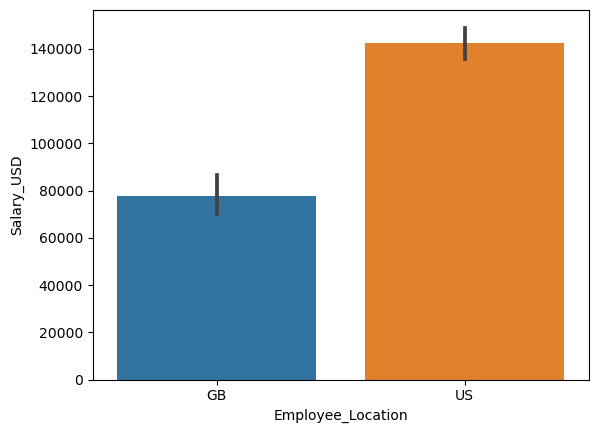

In [57]:
# employees in the US or GB
usa_and_gb = salaries[salaries["Employee_Location"].isin(["US", "GB"])]

# barplot of salaries by location
sns.barplot(data=usa_and_gb, x="Employee_Location", y="Salary_USD")
plt.show()

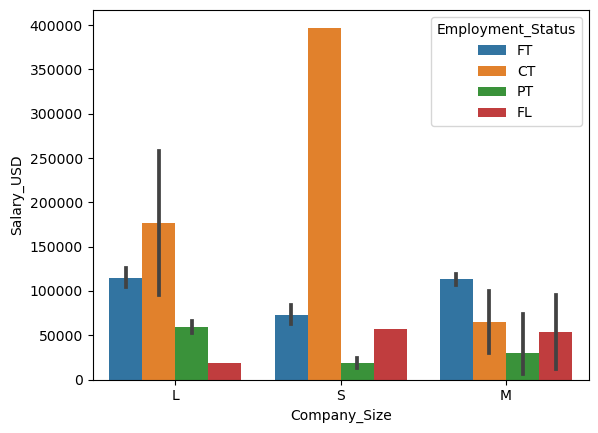

In [58]:
# bar plot of salary versus company size, factoring in employment status
sns.barplot(data=salaries, x="Company_Size", y="Salary_USD", hue="Employment_Status")
plt.show()